In [1]:
# model layer :

#  Dense(100)-->Dense(50)-->Dense(20)-->Dense(10)-->Dense(20)-->Dense(50)-->Dense(100)

In [2]:
# for image:

In [3]:
# using mnist data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# dataset import

from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

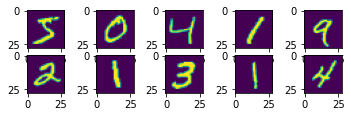

In [8]:
# data visualization

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])

In [9]:
# model layers

from tensorflow.keras.layers import Dense, GaussianNoise, Flatten, Reshape
from tensorflow.keras.models import Sequential

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
# encoder

Encoder = Sequential([
    Flatten(input_shape = [28,28]),
    Dense(400, activation = "relu"),
    Dense(300, activation = "relu"),
    Dense(100, activation = "relu"),
    Dense(50, activation = "relu")
])

In [12]:
50/(28*28)

0.06377551020408163

In [13]:
Decoder = Sequential([
    Dense(100, input_shape = [50], activation = "relu"),
    Dense(300, activation = "relu"),
    Dense(400, activation = "relu"),
    Dense(28*28, activation = "sigmoid"),
    Reshape([28,28])
])

In [14]:
AutoEncoder = Sequential([ Encoder, Decoder])

In [17]:
from tensorflow.keras.optimizers import SGD

In [18]:
AutoEncoder.compile(
    optimizer= SGD(lr = 0.2),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [19]:
# scaling the data

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [20]:
Model = AutoEncoder.fit(X_train_scaled, X_train_scaled, epochs = 10, validation_data= (X_test_scaled, X_test_scaled) )

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.3771 - accuracy: 0.0652 - val_loss: 0.2494 - val_accuracy: 0.0751
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2424 - accuracy: 0.0857 - val_loss: 0.2199 - val_accuracy: 0.1104
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2109 - accuracy: 0.1228 - val_loss: 0.1830 - val_accuracy: 0.1530
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1788 - accuracy: 0.1624 - val_loss: 0.1637 - val_accuracy: 0.1748
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1621 - accuracy: 0.1820 - val_loss: 0.1519 - val_accuracy: 0.1952
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1518 - accuracy: 0.1958 - val_loss: 0.1429 - val_accuracy: 0.2025
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1433 - accuracy: 0.2056 - val_loss: 0.1361 - val_ac

In [21]:
# validation

decoded_image = AutoEncoder.predict(X_test_scaled[:10])

original image


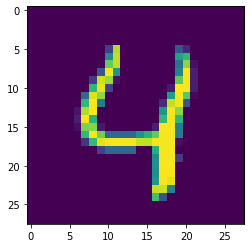

model's image


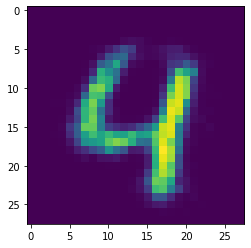

In [23]:
n = 4

print("original image")

plt.imshow(X_test_scaled[n])
plt.show()

print("model's image")

plt.imshow(decoded_image[n])